In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ANXIETY_DATA_ANALYSIS/Copy of final_data_prepared_all_columns.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               423 non-null    int64  
 1   gene_name                                                423 non-null    object 
 2   gene_score                                               423 non-null    int64  
 3   if_sum_Depressive_Disorder                               423 non-null    float64
 4   if_sum_Anxiety                                           423 non-null    float64
 5   if_sum_Mental_Disorders                                  423 non-null    float64
 6   if_sum_Depressive_Disorder_Major                         423 non-null    float64
 7   if_sum_Mood_Disorders                                    423 non-null    float64
 8   if_sum_Personality_Disorders  

In [ ]:
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df_input=df.drop(columns=["gene_name","gene_score"])

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
  """Calculate VIF for each feature in a DataFrame.

  Args:
      df: Pandas DataFrame

  Returns:
      Pandas DataFrame with VIF values for each feature.
  """
  vif_data = pd.DataFrame()
  vif_data["feature"] = df.columns
  vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif_data


vif_data = calculate_vif(df_input)

features_with_high_vif = vif_data[vif_data.VIF > 10]

while features_with_high_vif.shape[0] > 0:
  feature_to_remove = features_with_high_vif.iloc[0].feature
  df_input = df_input.drop(columns=[feature_to_remove])
  vif_data = calculate_vif(df_input)
  features_with_high_vif = vif_data[vif_data.VIF > 10]

print("Features after removing multicollinearity:")
print(df_input.columns)

Features after removing multicollinearity:
Index(['if_sum_Personality_Disorders', 'sum_of_MISC', 'sum_of_MCS',
       'sum_of_MA', 'sum_of_publications_anxiety_associated',
       'sum_of_publications_anxiety'],
      dtype='object')


In [ ]:
df_input['sum_of_JA']=df['sum_of_JA']
df_input['sum_of_RE']=df['sum_of_RE']
df_input['sum_of_RCT']=df['sum_of_RCT']

In [ ]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   if_sum_Personality_Disorders            423 non-null    float64
 1   sum_of_MISC                             423 non-null    float64
 2   sum_of_MCS                              423 non-null    float64
 3   sum_of_MA                               423 non-null    float64
 4   sum_of_publications_anxiety_associated  423 non-null    float64
 5   sum_of_publications_anxiety             423 non-null    float64
 6   sum_of_JA                               423 non-null    float64
 7   sum_of_RE                               423 non-null    float64
 8   sum_of_RCT                              423 non-null    float64
dtypes: float64(9)
memory usage: 29.9 KB


<Axes: >

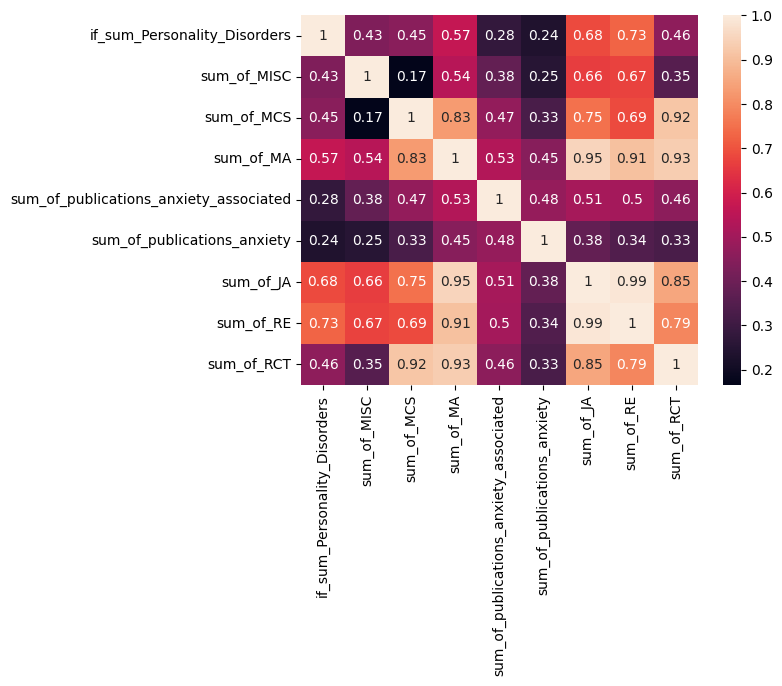

In [ ]:
import seaborn as sns
sns.heatmap(df_input.corr(), annot=True)

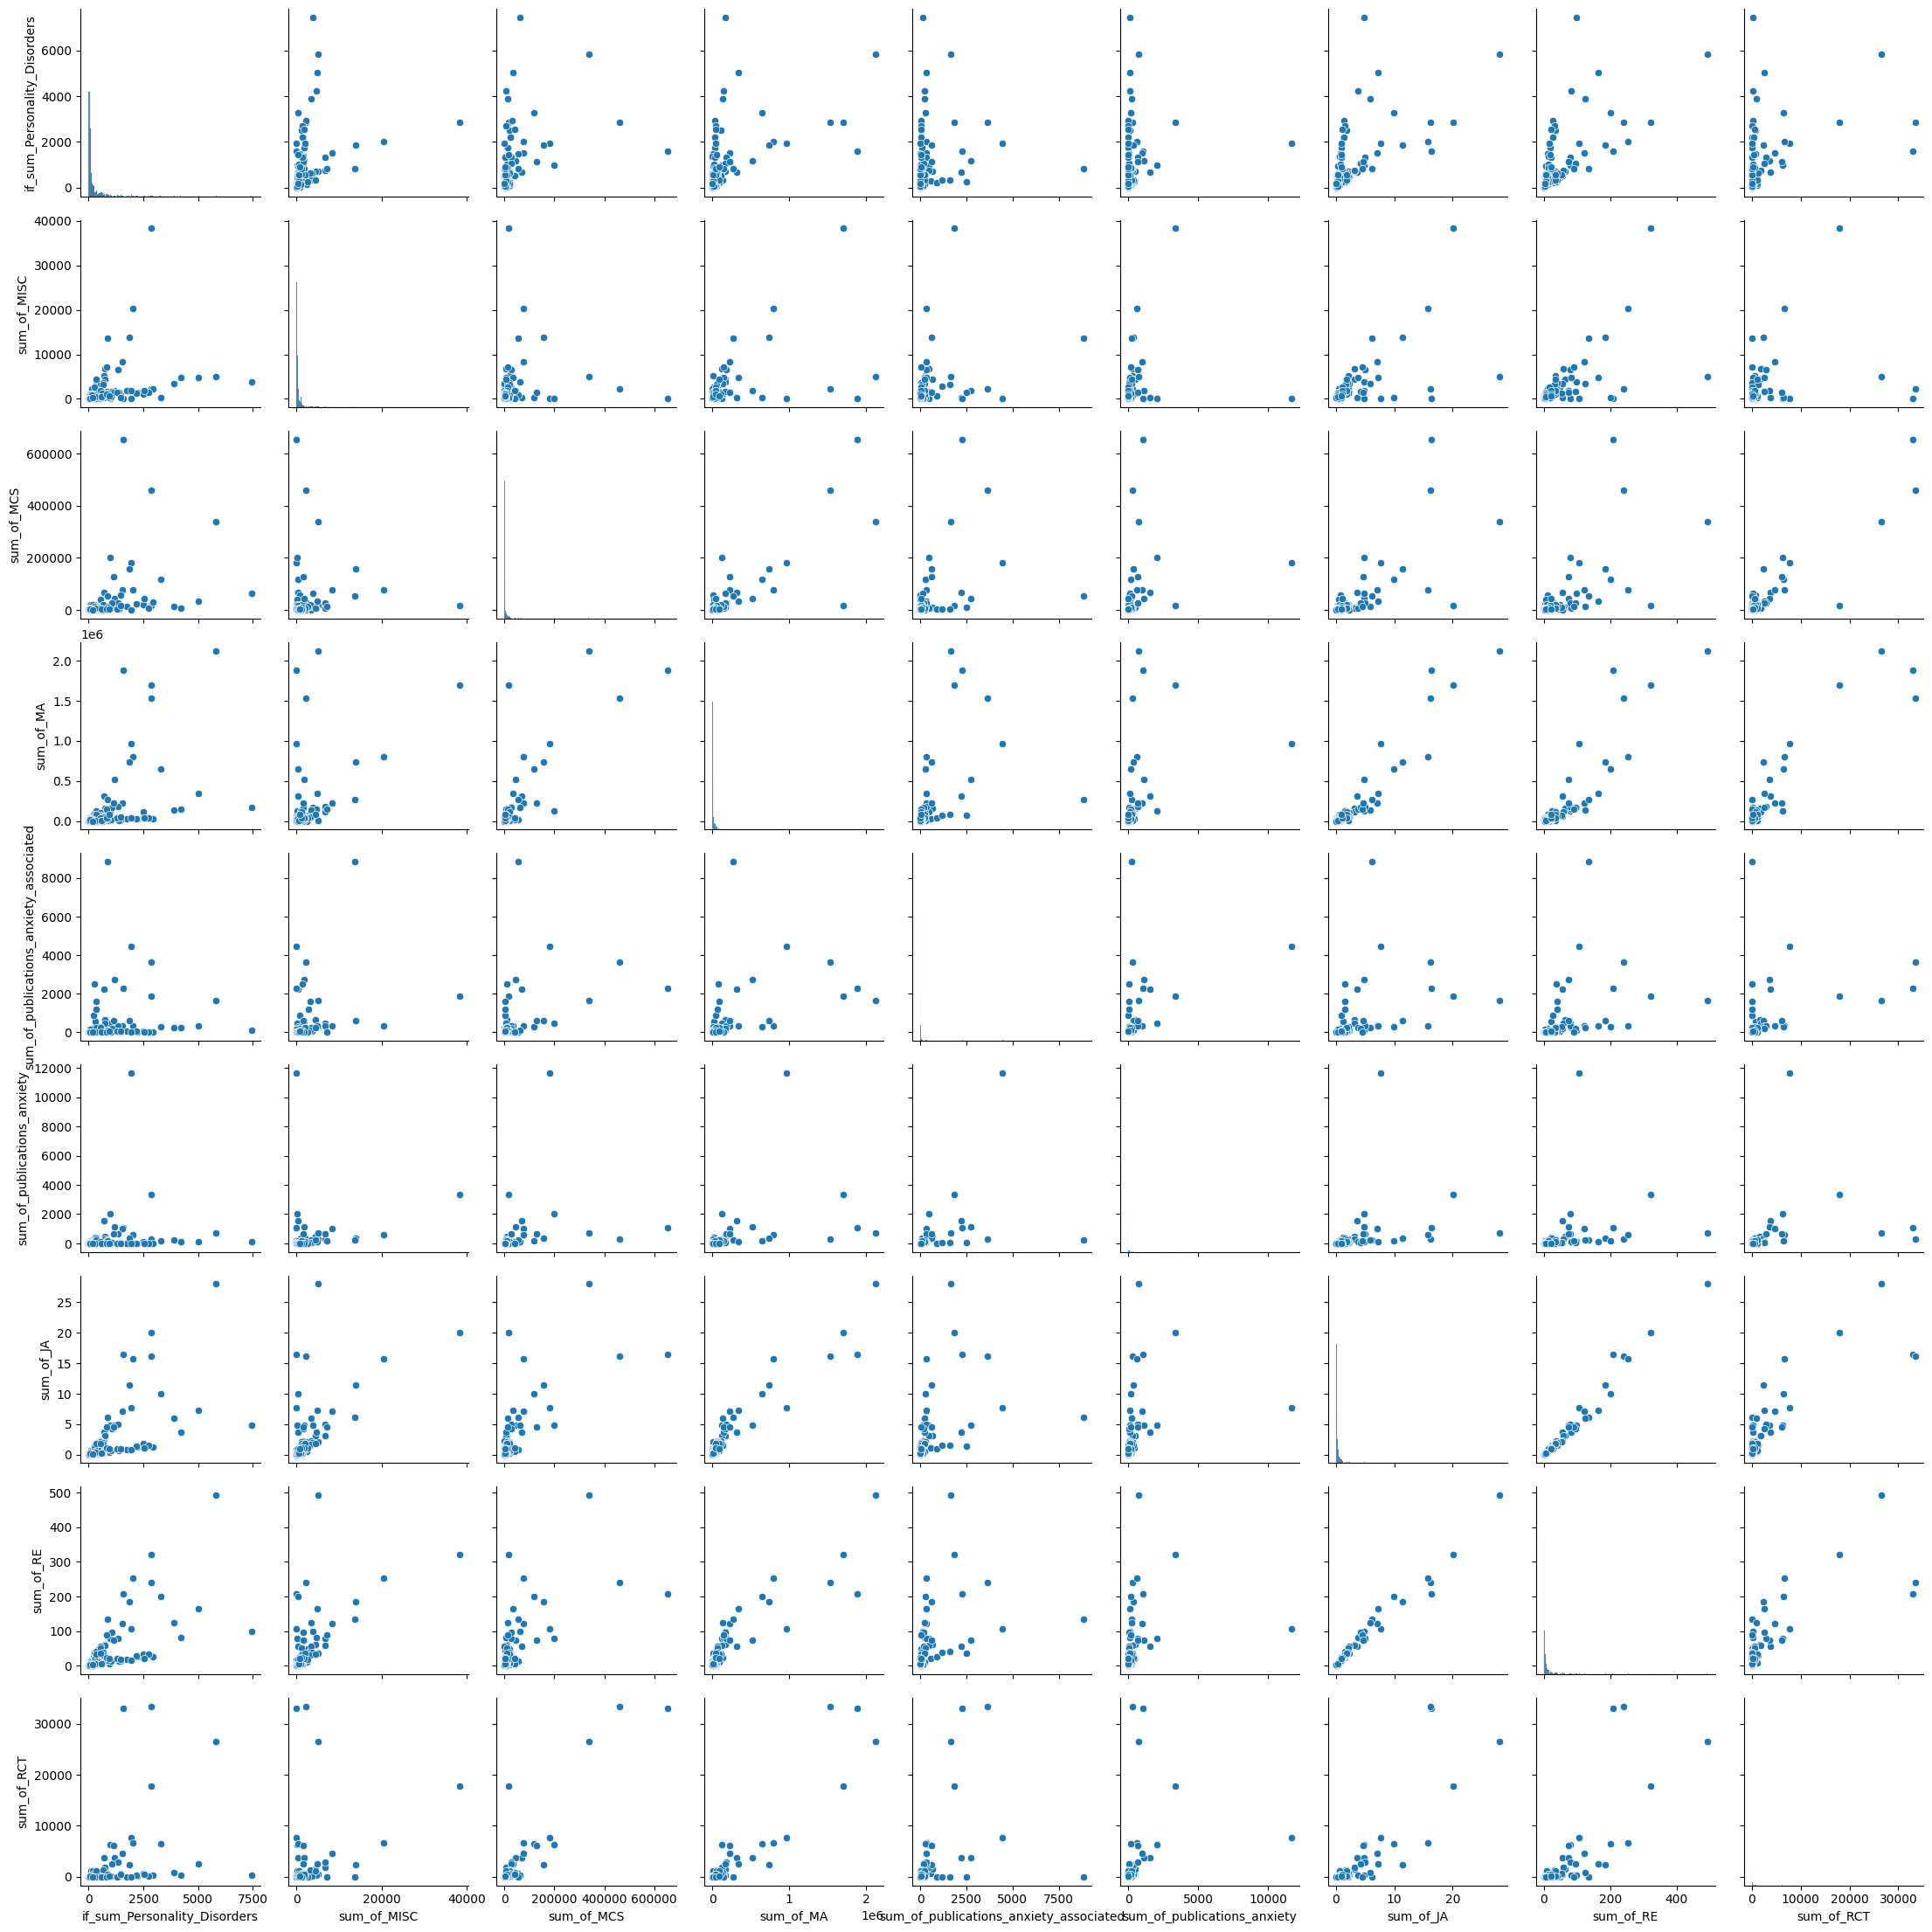

In [ ]:
sns.pairplot(df_input)

In [ ]:
df_input['gene_name']=df['gene_name']
df_input['gene_score']=df['gene_score']

In [ ]:
# pip install pycaret

In [ ]:
df_i=df_input[df_input['gene_score']==0]

In [ ]:
df_pycaret_input=df_i.drop(columns=['gene_name','gene_score'])

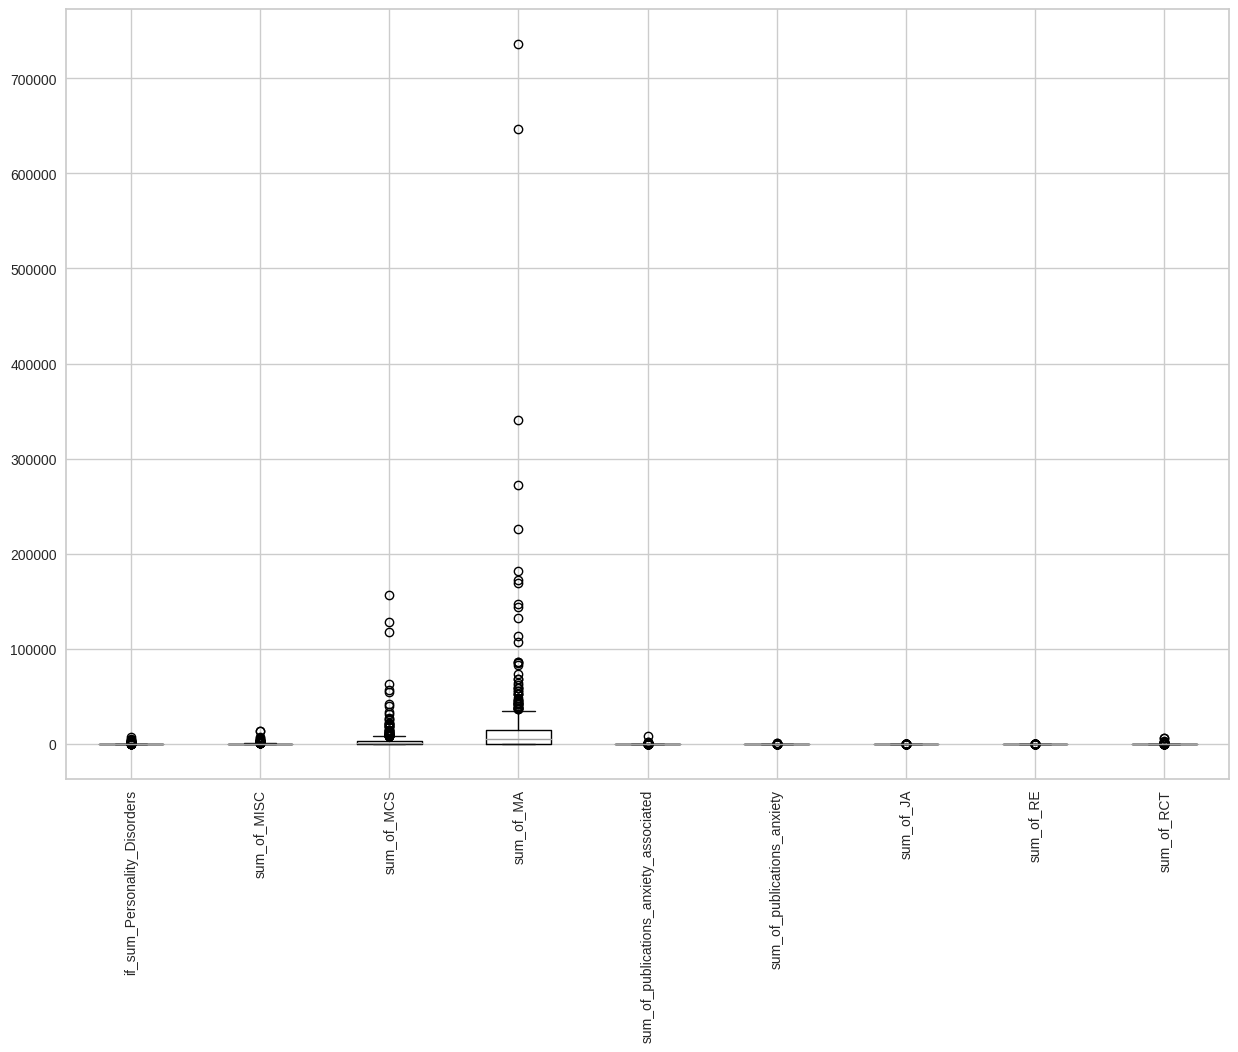

In [ ]:

plt.figure(figsize=(15, 10))
df_pycaret_input.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_pycaret_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 20 to 422
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   if_sum_Personality_Disorders            403 non-null    float64
 1   sum_of_MISC                             403 non-null    float64
 2   sum_of_MCS                              403 non-null    float64
 3   sum_of_MA                               403 non-null    float64
 4   sum_of_publications_anxiety_associated  403 non-null    float64
 5   sum_of_publications_anxiety             403 non-null    float64
 6   sum_of_JA                               403 non-null    float64
 7   sum_of_RE                               403 non-null    float64
 8   sum_of_RCT                              403 non-null    float64
dtypes: float64(9)
memory usage: 47.6 KB


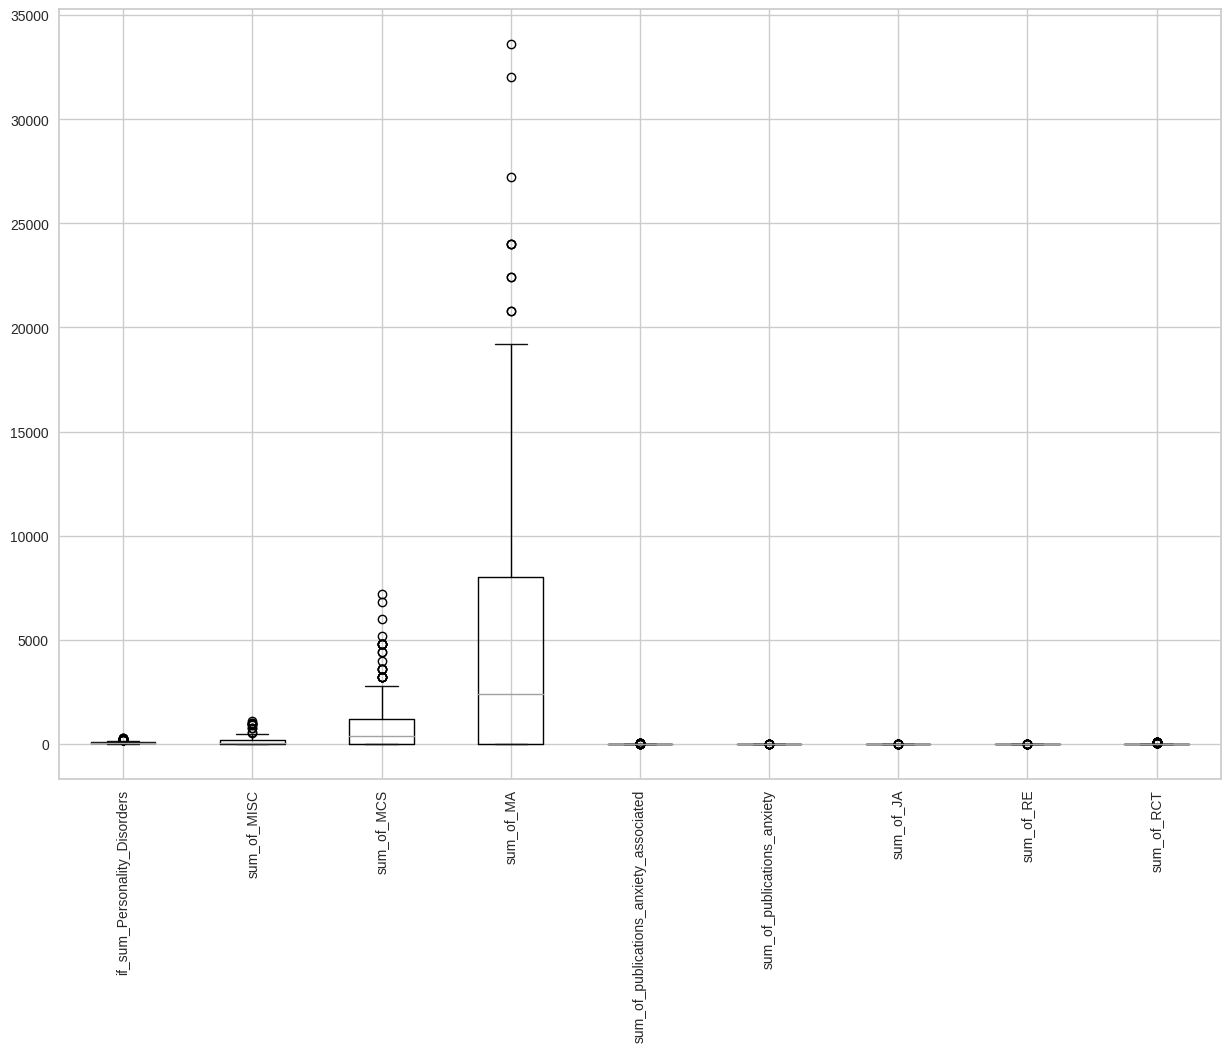

In [ ]:
# prompt: remove outliers using iqr method

def remove_outliers_iqr(df):
  """Removes outliers from a DataFrame using the IQR method.

  Args:
      df: Pandas DataFrame

  Returns:
      Pandas DataFrame with outliers removed.
  """
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_out

df_pycaret_input_no_outliers = remove_outliers_iqr(df_pycaret_input)


plt.figure(figsize=(15, 10))
df_pycaret_input_no_outliers.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Kmeans=KMeans(n_clusters=9)
sccaler=StandardScaler()
df_pycaret_input_scaled=sccaler.fit_transform(df_pycaret_input)
Kmeans.fit(df_pycaret_input_scaled)
# df_pycaret_input['cluster']=Kmeans.labels_

KMeans(n_clusters=9)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_pycaret_input_no_outliers,Kmeans.labels_)
print("Silhouette score:", silhouette_avg)

ValueError: Found input variables with inconsistent numbers of samples: [288, 403]

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
import numpy as np

# Scale the data
scaler = StandardScaler()
df_pycaret_input_scaled = scaler.fit_transform(df_pycaret_input)
df_pycaret_input.info()
# Apply PCA for dimensionality reduction
n_components = 0.98  # Specify the number of components (adjustable)
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df_pycaret_input_scaled)

# Define the models and parameter grids for tuning
param_grid = {
    'KMeans': {
        'n_clusters': [8, 9, 10, 12],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20]
    },
    'AgglomerativeClustering': {
        'n_clusters': [8, 9, 10, 12],
        'linkage': ['ward', 'complete', 'average']
    },
    'DBSCAN': {
        'eps': [0.3, 0.5, 0.7],
        'min_samples': [5, 10, 20]
    },
    'GaussianMixture': {
        'n_components': [8, 9, 10, 12],
        'covariance_type': ['full', 'tied', 'diag', 'spherical'],
        'n_init': [1, 5, 10]
    }
}

# Dictionary to store the best models and their silhouette scores
best_models = {}
best_score = -1
best_model = None

# Loop through each model and its parameters
for model_name, params in param_grid.items():
    for param_set in ParameterGrid(params):
        # Initialize model with current parameters
        if model_name == 'KMeans':
            model = KMeans(**param_set)
        elif model_name == 'AgglomerativeClustering':
            model = AgglomerativeClustering(**param_set)
        elif model_name == 'DBSCAN':
            model = DBSCAN(**param_set)
        elif model_name == 'GaussianMixture':
            model = GaussianMixture(**param_set)
            labels = model.fit_predict(df_reduced)  # Fit GMM and get labels separately for silhouette

        # Fit the model and get labels (if not GMM)
        if model_name != 'GaussianMixture':
            labels = model.fit_predict(df_reduced)

        # Check if the model produces clusters (for DBSCAN, some configs may give a single cluster)
        if len(set(labels)) > 1:
            score = silhouette_score(df_reduced, labels)
            if score > best_score:
                best_score = score
                best_model = (model_name, model)

        # Save the score for each parameter set
        best_models[(model_name, str(param_set))] = score

# Output the best model and its score
print("Best model:", best_model)
print("Best silhouette score:", best_score)

# Optional: Print all model scores for comparison
for model_params, score in best_models.items():
    print(f"Model: {model_params[0]}, Params: {model_params[1]}, Silhouette Score: {score}")

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 20 to 422
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   if_sum_Personality_Disorders            403 non-null    float64
 1   sum_of_MISC                             403 non-null    float64
 2   sum_of_MCS                              403 non-null    float64
 3   sum_of_MA                               403 non-null    float64
 4   sum_of_publications_anxiety_associated  403 non-null    float64
 5   sum_of_publications_anxiety             403 non-null    float64
 6   sum_of_JA                               403 non-null    float64
 7   sum_of_RE                               403 non-null    float64
 8   sum_of_RCT                              403 non-null    float64
dtypes: float64(9)
memory usage: 47.6 KB
Best model: ('AgglomerativeClustering', AgglomerativeClustering(linkage='average', n_clusters=8))
Be

In [ ]:
             df_pycaret_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   if_sum_Personality_Disorders            423 non-null    float64
 1   sum_of_MISC                             423 non-null    float64
 2   sum_of_MCS                              423 non-null    float64
 3   sum_of_MA                               423 non-null    float64
 4   sum_of_publications_anxiety_associated  423 non-null    float64
 5   sum_of_publications_anxiety             423 non-null    float64
 6   sum_of_JA                               423 non-null    float64
 7   sum_of_RE                               423 non-null    float64
 8   sum_of_RCT                              423 non-null    float64
 9   cluster                                 423 non-null    int64  
 10  reassigned_cluster                      423 non-null    int64 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Scale the data
scaler = StandardScaler()
df_pycaret_input = df_pycaret_input
df_pycaret_input_scaled = scaler.fit_transform(df_pycaret_input)

pca = PCA(n_components=0.98)
df_pycaret_input_scaled = pca.fit_transform(df_pycaret_input_scaled)

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=9, linkage='average')
agglomerative.fit(df_pycaret_input_scaled)
labels = agglomerative.labels_

df_pycaret_input['cluster'] = labels

centroids = df_pycaret_input.groupby('cluster').mean()

centroid_distances = np.linalg.norm(centroids, axis=1)

sorted_clusters = np.argsort(centroid_distances)
new_cluster_labels = np.zeros_like(labels)

for new_label, old_label in enumerate(sorted_clusters):
    new_cluster_labels[labels == old_label] = new_label

df_pycaret_input['reassigned_cluster'] = new_cluster_labels

silhouette_avg = silhouette_score(df_pycaret_input_scaled, new_cluster_labels)
davies_bouldin = davies_bouldin_score(df_pycaret_input_scaled, new_cluster_labels)

print("Silhouette score after reassignment:", silhouette_avg)
print("Davies-Bouldin score after reassignment:", davies_bouldin)


Silhouette score after reassignment: 0.8464597953017281
Davies-Bouldin score after reassignment: 0.37345031471551804


In [ ]:
new_data=df_input[df_input['gene_score']!=0].drop(columns=['gene_name','gene_score'])
new_data_scaled = scaler.transform(new_data)
pca = PCA(n_components=0.98)
new_data_scaled = pca.fit_transform(new_data_scaled)

# Predict cluster labels for new data
new_data_labels = agglomerative.fit_predict(new_data_scaled)

# 'new_data_labels' will now contain the cluster assignments for your new data points
print(new_data_labels)

# You can add the predicted labels to your 'new_data' DataFrame
new_data['cluster'] = new_data_labels

[7 2 0 8 2 0 2 3 2 5 2 2 4 2 2 6 0 2 2 1]


In [ ]:
new_data['gene_name']=df['gene_name']
new_data['gene_score']=df['gene_score']

In [ ]:
new_data

,if_sum_Personality_Disorders,sum_of_MISC,sum_of_MCS,sum_of_MA,sum_of_publications_anxiety_associated,sum_of_publications_anxiety,sum_of_JA,sum_of_RE,sum_of_RCT,cluster,gene_name,gene_score
0,1938.500,0.0,181600.0,964800.0,4466.0,11664.0,7.6914,106.808,7670.0,7,SLC6A4,7
1,296.000,1750.0,5200.0,25600.0,560.0,406.0,1.1304,21.504,740.0,2,ADORA2A,7
2,693.100,250.0,67600.0,313600.0,2226.0,1568.0,3.6286,55.792,3770.0,0,COMT,8
3,993.900,100.0,200000.0,128000.0,486.0,2044.0,4.8516,78.480,6250.0,8,HTR1A,7
4,200.200,200.0,20800.0,51200.0,88.0,242.0,0.5406,9.272,280.0,2,ADRA2A,7
5,1182.900,1800.0,44000.0,521600.0,2748.0,1132.0,4.8660,73.576,3660.0,0,DRD2,7
6,54.252,0.0,19600.0,24000.0,28.0,170.0,0.2346,3.312,360.0,2,CCKBR,7
7,1581.400,0.0,654000.0,1881600.0,2290.0,1046.0,16.3942,208.224,33020.0,3,CRP,4
8,710.886,5100.0,18400.0,9600.0,272.0,295.0,2.1558,35.392,490.0,2,FMR1,6
9,2863.668,2150.0,460800.0,1532800.0,3647.0,294.0,16.1844,240.120,33450.0,5,INS,7


In [ ]:
groupby=new_data.groupby(['cluster','gene_score']).size().unstack(fill_value=0)

In [ ]:
groupby

gene_score,4,6,7,8
cluster,,,,
0,1,0,1,1
1,1,0,0,0
2,1,4,5,0
3,1,0,0,0
4,0,0,0,1
5,0,0,1,0
6,1,0,0,0
7,0,0,1,0
8,0,0,1,0


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
gmm = GaussianMixture(n_components=9, covariance_type='full')
gmm.fit(df_pycaret_input_scaled)
labels = gmm.predict(df_pycaret_input_scaled)
probabilities = gmm.predict_proba(df_pycaret_input_scaled)
silhouette_avg = silhouette_score(df_pycaret_input_scaled, labels)
print("Silhouette score:", silhouette_avg)
davies_bouldin = davies_bouldin_score(df_pycaret_input_scaled, labels)
print("Davies-Bouldin score:", davies_bouldin)

Silhouette score: 0.407400070965484
Davies-Bouldin score: 0.8065955391936707


ValueError: num must be an integer with 1 <= num <= 9, not 10

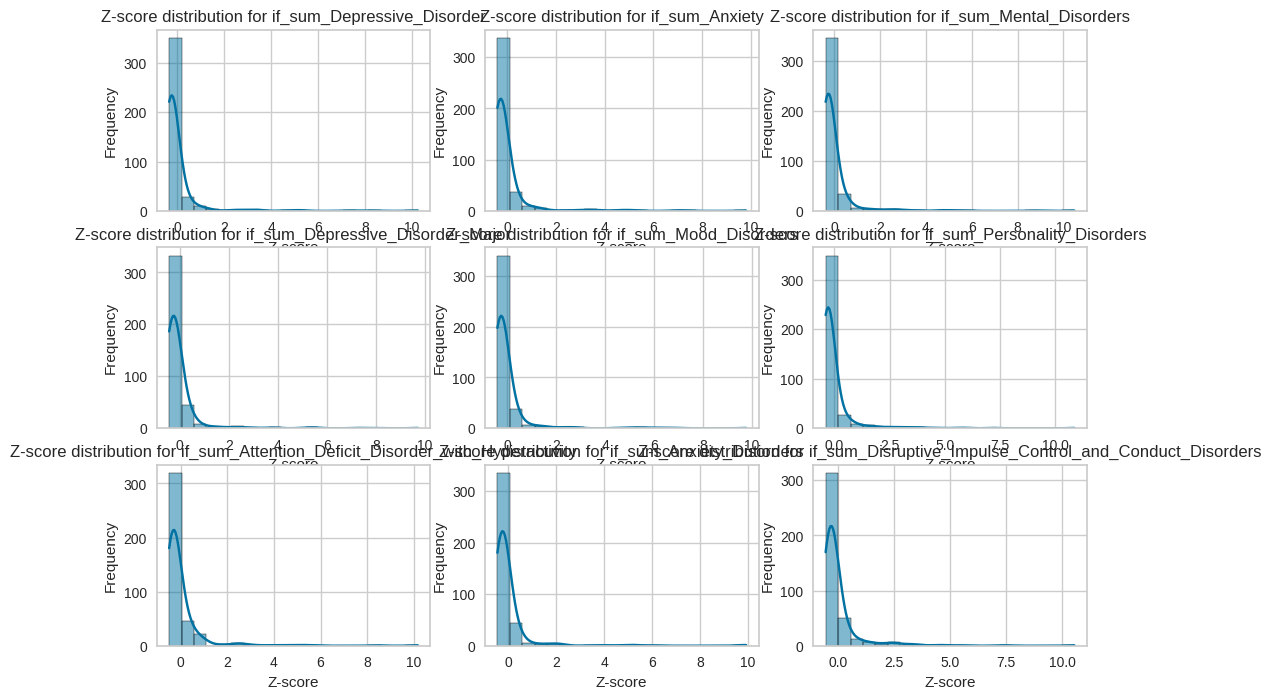

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df_pycaret_input=df[df['gene_score']==0].drop(columns=['gene_name','gene_score'])
# Step 1: Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_pycaret_input)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the scaled data to a DataFrame for easier plotting
df_zscore = pd.DataFrame(df_normalized, columns=df_pycaret_input.columns)

# Plotting the Z-scores for each feature as histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_zscore.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the layout based on the number of columns
    sns.histplot(df_zscore[col], kde=True, bins=20)
    plt.title(f'Z-score distribution for {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Step 2: Bin the data into categories (1-9)
# Use the `pd.cut` function to bin each feature into 9 categories
# Assuming you're binning across the entire dataset, flatten and bin each value
num_bins = 9
bin_labels = range(1, num_bins + 1)
df_binned = pd.DataFrame()

for col in range(df_normalized.shape[1]):
    df_binned[f'bin_{col}'] = pd.cut(df_normalized[:, col], bins=num_bins, labels=bin_labels).codes + 1

# Prepare the binned data as the target variable for training
# This example uses a simple approach by summing bins across features
# You can adjust the binning method based on your needs
df_binned['target_bin'] = df_binned.sum(axis=1) % num_bins + 1  # Simple bin aggregation for illustrative purposes

# Step 3: Train a classifier on binned data
X_train, X_test, y_train, y_test = train_test_split(df_normalized, df_binned['target_bin'], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

new_data=df[df['gene_score']!=0].drop(columns=['gene_name','gene_score'])
# For new data
new_data_normalized = scaler.transform(new_data)  # Normalize the new data
new_data_predictions = model.predict(new_data_normalized)  # Predict bins for new data
new_data['predicted_bin'] = new_data_predictions
print("Predicted bins for new data:", new_data_predictions)


In [ ]:
new_data['gene_name']=df['gene_name']
new_data['gene_score']=df['gene_score']

In [ ]:
groupby=new_data.groupby(['predicted_bin','gene_score']).size().unstack(fill_value=0)

In [ ]:
groupby

gene_score,4,6,7,8
predicted_bin,,,,
1,1,0,4,0
2,0,1,1,0
3,0,1,0,0
4,1,0,0,0
6,1,0,0,0
9,2,2,4,2


**autoencoder way**

know scores as centroids

### recreate scores from 4 to 8

0 scores remove , 4,6,7,8

4 -> 1 to 5

regression